In [1]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
#model
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# linear regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from matplotlib.ticker import PercentFormatter
from pylab import rcParams


In [2]:
data = pd.read_csv('redfin_2020-04-09_SFO.csv')

In [3]:
data.head(3)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Condo/Co-op,1544 Jones St,San Francisco,CA,94109,1350000,2.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/1544-Jo...,San Francisco MLS,496754,N,Y,37.795592,-122.414747
1,MLS Listing,NaN,Condo/Co-op,1 S South Park St #311,San Francisco,CA,94107,1450000,2.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/1-S-Par...,San Francisco MLS,496645,N,Y,37.782053,-122.392835
2,MLS Listing,NaN,Single Family Residential,307 Faxon Ave,San Francisco,CA,94112,899000,2.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/307-Fax...,San Francisco MLS,496300,N,Y,37.720212,-122.460457


In [4]:
data.describe()

,SOLD DATE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
count,0.0,350.000000,3.500000e+02,337.000000,320.000000,312.000000,1.510000e+02,326.000000,350.000000,312.000000,186.000000,350.000000,350.000000
mean,NaN,94115.002857,2.007335e+06,2.967359,2.178125,2061.974359,1.196197e+06,1958.641104,34.014286,1091.512821,723.575269,37.766510,-122.425562
std,NaN,15.726622,1.369201e+06,2.213756,1.126549,1614.823911,1.466130e+07,45.893958,20.878481,401.806387,390.058675,0.024149,0.030115
min,NaN,94014.000000,2.990000e+05,0.000000,0.500000,262.000000,7.500000e+02,1878.000000,1.000000,88.000000,3.000000,37.708045,-122.510420
25%,NaN,94107.000000,1.080222e+06,2.000000,1.000000,1000.750000,2.273000e+03,1912.250000,14.000000,827.250000,489.000000,37.749928,-122.442035
50%,NaN,94112.000000,1.598500e+06,3.000000,2.000000,1624.500000,2.809000e+03,1957.000000,34.000000,1061.500000,631.000000,37.771624,-122.421361
75%,NaN,94122.750000,2.475000e+06,4.000000,3.000000,2495.500000,3.437000e+03,2007.000000,50.000000,1300.250000,925.500000,37.786499,-122.405420
max,NaN,94158.000000,8.880000e+06,17.000000,8.000000,12200.000000,1.801642e+08,2020.000000,76.000000,3454.000000,3083.000000,37.805510,-122.367258


# Exploratory Data Analysis

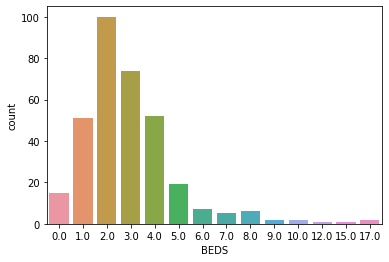

In [5]:
ax = sns.countplot('BEDS',data=data)

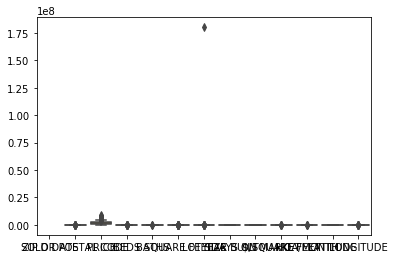

In [6]:
sns.boxplot(data=data)


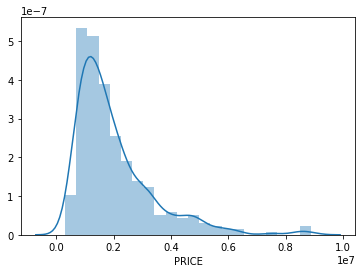

In [7]:
sns.distplot(data["PRICE"])

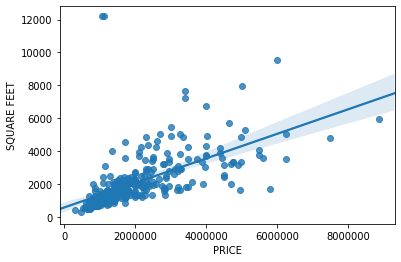

In [8]:
sns.regplot(x='PRICE',y='SQUARE FEET',data=data)


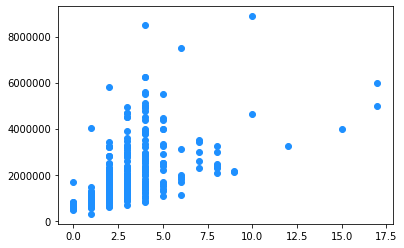

In [9]:
#price vs. beds and baths counts
plt.scatter((data['BEDS']), data['PRICE'],color = 'dodgerblue')


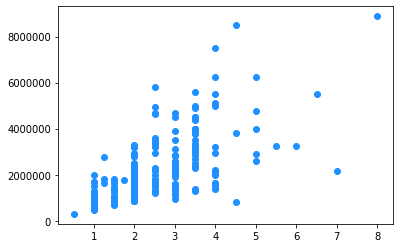

In [10]:
#price vs. beds and baths counts
plt.scatter((data['BATHS']), data['PRICE'],color = 'dodgerblue')

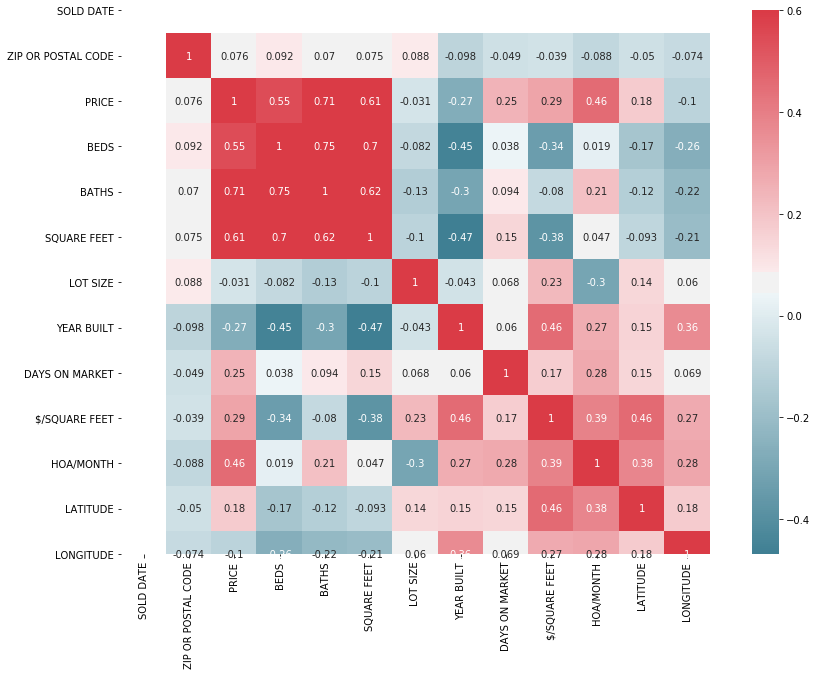

In [11]:
# Correlating Features
plt.figure(figsize=(15,10))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(data.corr(), cmap=colormap, vmax=0.6, square=True, annot=True)

# Data Cleansing

In [12]:
#drop unnecessary features
features_drop = ['SOLD DATE','ADDRESS','HOA/MONTH','STATUS','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME',
                'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
                'SOURCE','MLS#','DAYS ON MARKET','$/SQUARE FEET','SALE TYPE','PROPERTY TYPE','CITY','STATE OR PROVINCE']
data = data.drop(features_drop,axis=1)

In [13]:
#rename features
data = data.rename(columns={'SQUARE FEET':'SQUARE_FEET',
                            'LOT SIZE':'LOT_SIZE',
                            'YEAR BUILT':'YEAR_BUILT',
                           'SALE TYPE':'SALE_TYPE',
                           'PROPERTY TYPE':'PROPERTY_TYPE',
                           'STATE OR PROVINCE':'STATE_OR_PROVINCE'})

In [14]:
#fill in missing data
data['PRICE'].fillna(data['PRICE'].median(), inplace = True)
data['BEDS'].fillna(data['BEDS'].median(), inplace = True)
data['BATHS'].fillna(data['BATHS'].median(), inplace = True)
data['SQUARE_FEET'].fillna(data['SQUARE_FEET'].median(), inplace = True)
data['LOT_SIZE'].fillna(data['LOT_SIZE'].median(), inplace = True)

In [15]:
#drop rows with missing location
data.dropna(subset=['LOCATION'], inplace=True)
data.dropna(subset=['YEAR_BUILT'], inplace=True)

In [16]:
data.isnull().sum()

ZIP OR POSTAL CODE    0
PRICE                 0
BEDS                  0
BATHS                 0
LOCATION              0
SQUARE_FEET           0
LOT_SIZE              0
YEAR_BUILT            0
FAVORITE              0
INTERESTED            0
LATITUDE              0
LONGITUDE             0
dtype: int64

# Linear Regression Model

In [17]:
data.head(1)

,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE_FEET,LOT_SIZE,YEAR_BUILT,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,94109,1350000,2.0,2.0,Nob Hill,1078.0,2809.0,1910.0,N,Y,37.795592,-122.414747


In [18]:
feature_data = data.drop(['PRICE','LOCATION','FAVORITE','INTERESTED'],axis=1)
target_data = data['PRICE']
X_train,X_test,y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3)

In [19]:
feature_data

,ZIP OR POSTAL CODE,BEDS,BATHS,SQUARE_FEET,LOT_SIZE,YEAR_BUILT,LATITUDE,LONGITUDE
0,94109,2.0,2.0,1078.0,2809.0,1910.0,37.795592,-122.414747
1,94107,2.0,2.0,1112.0,2809.0,2007.0,37.782053,-122.392835
2,94112,2.0,1.0,1624.5,1873.0,1927.0,37.720212,-122.460457
3,94103,2.0,2.5,1266.0,2809.0,2009.0,37.776800,-122.409261
4,94108,2.0,2.0,1519.0,2809.0,1955.0,37.792690,-122.412505
...,...,...,...,...,...,...,...,...
343,94123,4.0,2.0,3900.0,3598.0,1922.0,37.795123,-122.437982
344,94112,3.0,3.0,1624.5,1875.0,1905.0,37.727162,-122.426231
345,94103,3.0,2.0,1313.0,2809.0,2015.0,37.768605,-122.426534
347,94109,2.0,2.0,824.0,2809.0,2012.0,37.793212,-122.423746


In [20]:
df_train = pd.concat([X_train,y_train],axis=1)
linear_regression = smf.ols(formula='PRICE ~ + BEDS + BATHS + LATITUDE + LONGITUDE + SQUARE_FEET + LOT_SIZE+ YEAR_BUILT', data=df_train)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     48.29
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           3.93e-41
Time:                        16:44:54   Log-Likelihood:                -3432.6
No. Observations:                 228   AIC:                             6881.
Df Residuals:                     220   BIC:                             6909.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.712e+08   2.75e+08     -1.351      0.178   -9.12e+08     1.7e+08
BEDS          9.71e+04   3.61e+04      2.688      0.008    2.59e+04    1.68e+05
BATHS        5.472e+05    6.4e+04      8.550      0.000    4.21e+05    6.73e+05
LATITUDE      1.58e+07   2.37e+06      6.670      0.000    1.11e+07    2.05e+07
LONGITUDE    1.832e+06   2.09e+06      0.877      0.381   -2.28e+06    5.95e+06
SQUARE_FEET   214.1292     46.631      4.592      0.000     122.228     306.030
LOT_SIZE       70.5250     61.136      1.154      0.250     -49.963     191.013
YEAR_BUILT   -752.2911   1591.259     -0.473      0.637   -3888.353    2383.770
==============================================================================
Omnibus:                       34.771   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.903
Skew:                           0.616   Prob(JB):                     4.52e-23
Kurtosis:                       6.052   Cond. No.                     2.08e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Lasso, Ridge

### Ridge

In [21]:
ridge = Ridge()

In [22]:
parameters = {'alpha' : [1e-15, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, .5e-1, 1, 5, 20]}

In [23]:
from sklearn.model_selection import GridSearchCV
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)

In [24]:
ridge_regressor.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.05, 1, 5, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [25]:
rr = Ridge(alpha=0.01) #  comparison with alpha value
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [27]:
print ('Ridge Train Score: ',Ridge_train_score)
print ('Ridge Test Score: ',Ridge_test_score)

Ridge Train Score:  0.6076210885123957
Ridge Test Score:  -1238561.0352892394


In [28]:
rr0001 = Ridge(alpha=0.001) #  comparison with alpha value
rr0001.fit(X_train, y_train)
Ridge_train_score0001 = rr0001.score(X_train,y_train)
Ridge_test_score0001 = rr0001.score(X_test, y_test)
print ('Ridge Train Score: ',Ridge_train_score0001)
print ('Ridge Test Score: ',Ridge_test_score0001)

Ridge Train Score:  0.6080453654278948
Ridge Test Score:  -1279799.5210623185


### Lasso

In [29]:
# when alpha = 1.0
lasso = Lasso()
lasso.fit(X_train,y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [31]:
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.6080502699421211
test score:  -1284468.4728869728
number of features used:  8


In [32]:
# alpha = 0.01
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(feature_data,target_data)
test_score=lasso.score(feature_data,target_data)

In [33]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [34]:
print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.6015424828949638
test score for alpha =0.01:  0.6501415318603749
number of features used: for alpha =0.01: 8


In [35]:
#alpha = 0.0001
# best score
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001)
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.6080502716810401
test score for alpha =0.0001:  -1284724.534282523
number of features used: for alpha =0.0001: 8


In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print ("LR training score:", lr_train_score)
print ("LR test score: ", lr_test_score)

LR training score: 0.6080502716810332
LR test score:  -1284724.559896395


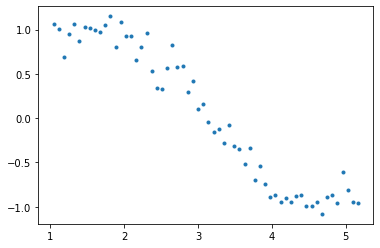

In [37]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['PRICE','SQUARE_FEET'])
plt.plot(data['PRICE'],data['SQUARE_FEET'],'.')

In [38]:
for i in range(2,16):  #power of 1 is already there
    colname = 'PRICE_%d'%i      #new var will be x_power
    data[colname] = data['PRICE']**i
data.head(3)

,PRICE,SQUARE_FEET,PRICE_2,PRICE_3,PRICE_4,PRICE_5,PRICE_6,PRICE_7,PRICE_8,PRICE_9,PRICE_10,PRICE_11,PRICE_12,PRICE_13,PRICE_14,PRICE_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521


### Price and Square Feet

In [39]:
#Import Linear Regression model from scikit-learn.
# Price vs. Square_feet
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['PRICE']
    if power>=2:
        predictors.extend(['PRICE_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['SQUARE_FEET'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['PRICE'],y_pred)
        plt.plot(data['PRICE'],data['SQUARE_FEET'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['SQUARE_FEET'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [40]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['PRICE_%d'%i for i in range(1,16)]
ind = ['PRICE_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)


In [41]:
#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}


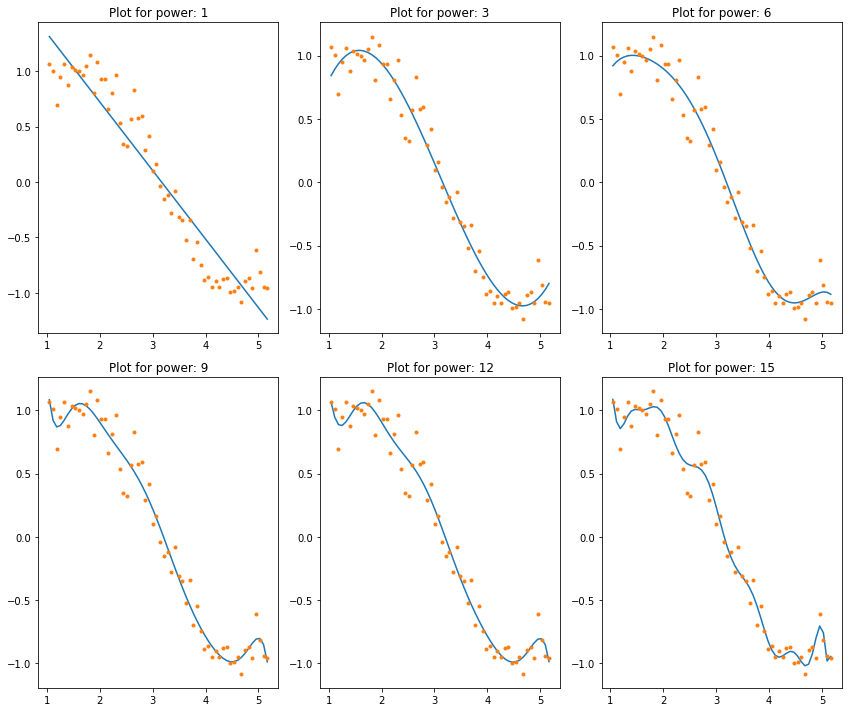

In [42]:
#Iterate through all powers and assimilate results
rcParams['figure.figsize'] = 12, 10
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [43]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,PRICE_1,PRICE_2,PRICE_3,PRICE_4,PRICE_5,PRICE_6,PRICE_7,PRICE_8,PRICE_9,PRICE_10,PRICE_11,PRICE_12,PRICE_13,PRICE_14,PRICE_15
PRICE_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRICE_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRICE_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRICE_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRICE_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRICE_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRICE_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRICE_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRICE_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
PRICE_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


In [44]:
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    
    ridgereg.fit(data[predictors],data['SQUARE_FEET'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['PRICE'],y_pred)
        plt.plot(data['PRICE'],data['SQUARE_FEET'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['SQUARE_FEET'])**2)
    aic = len(data)*np.log(rss/len(data)) + 2*(len(data.columns)-1)
    ret = [rss]
    ret.extend([aic])
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

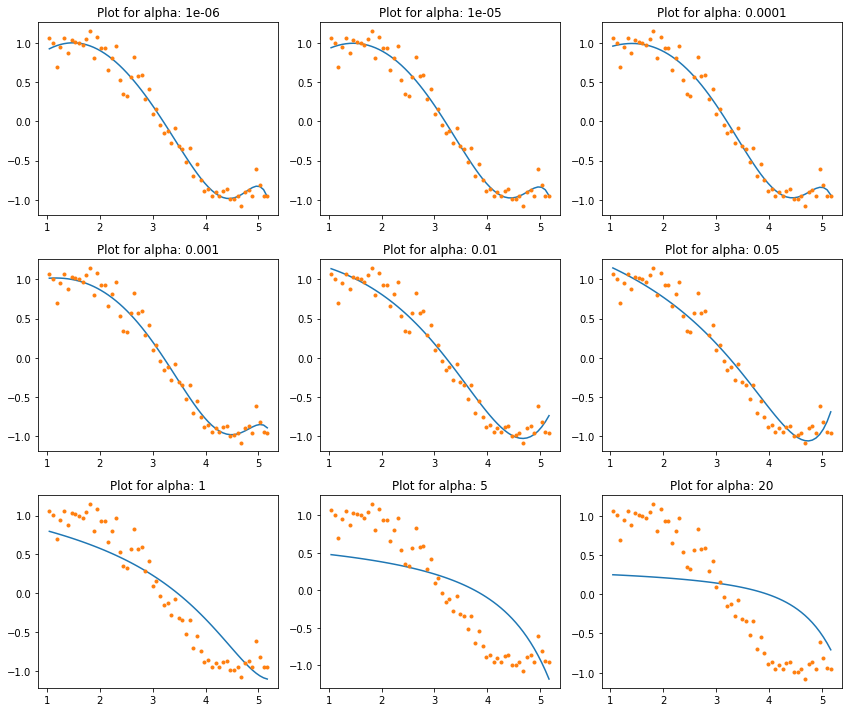

In [ ]:
#Initialize predictors to be set of 15 powers of x
predictors=['PRICE']
predictors.extend(['PRICE_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, .5e-1, 1, 5, 20]

#Initialize the dataframe for storing coefficients.
col = ['sse','aic','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-6:331, 1e-5:332, 1e-4:333, 1e-3:334, 1e-2:335, .5e-1:336, 1:337, 5:338, 20:339}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)